# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 3: <font color=blue>Multi-Class Classification</font>

## <font color=green>Multi-Class  </font>
>For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you have learned can be used for this classification task.
In the first part of the exercise, you will extend your previous implementation of logistic regression and apply it to one-vs-all classification.


In [3]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# import of my own functions
import my_ML_functions
#set up
sigmoid = my_ML_functions.sigmoid

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Let's first import the data and visualize it

In [4]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat('MultiClass-ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

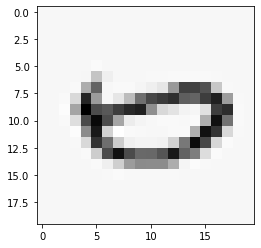

In [337]:
img = X[150]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys)

## Vectorizing the cost function and the gradient (lrfunction)
> J(θ)= (1/m) Sum[−y log(hθ(x))−(1−y)log(1−hθ(x))]

In [338]:
def lrfunction(theta,X,y,Lambda):
    """Define the logistic regression function that calculate the 
    cost J and the gradient 
    """
    # initialize the values
    J = 0
    grad = np.zeros(theta.shape)
    m,n = X.shape
    # convert labels to ints if their type is bool
    #if y.dtype == bool:
    #    y = y.astype(int)
    # Costfunction
    #h = sigmoid(X.dot(theta.T))
    h = sigmoid(X.dot(theta))
    temp = theta
    temp[0] = 0
    
    part1 = y.T @ np.log(h)
    part2 = (1 - y.T) @ np.log(1 - h)
    reg = (Lambda/(2*m))*np.sum(np.square(temp))
    J = (1 / m) * np.sum(-1*part1 - part2) + reg
    #
    # Gradient
    #grad = (1 / m) * (h - y).dot(X) + (Lambda / m) * temp
    grad = (1 / m) * X.T.dot((h - y)) + (Lambda / m) * temp
    #
    return J,grad

Testing the lrfunction:

In [339]:
# Testing examples
#theta_t = np.array([-2, -1, 1, 2])
theta_t = np.c_[[-2,-1,1,2]]
ones = np.ones((5,1)) 
x_t = np.arange(1, 16).reshape(5,3,order='F')/10
X_t = np.concatenate([ones, x_t],axis=1)
#y_t = np.array([1,0,1,0,1])
y_t = np.c_[[1,0,1,0,1]]
Lambda = 3
N = len(X_t)
# testing: Expected cost: 2.534819
# testing: Expected gradients: 0.146561 -0.548558 0.724722 1.398003

print(lrfunction(theta_t,X_t,y_t,Lambda))

(2.534819396109744, array([[ 0.14656137],
       [-0.54855841],
       [ 0.72472227],
       [ 1.39800296]]))


## One-vs-All Classification 
>In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset. In the handwritten digits dataset, K = 10, but your code should work for any value of K.

In [341]:
def oneVsAll(X,y,Lambda):
    """Train our logistic regression model
    """
    #set up variables: m = nbre training example, n = number of X's input
    m,n = X.shape
    #
    nbre_labels = 10
    # weights
    all_theta = np.ones((nbre_labels,n+1))
    # Add ones to the X mat
    ones = np.ones((m,1))
    Xp = np.concatenate([ones,X],axis=1)
    #
    options = {'maxiter': 50}
    for c in range(nbre_labels):
        Init_theta = np.c_[np.ones(n+1)]
        res = optimize.minimize(lrfunction,Init_theta,(Xp,(y_data==c),Lambda),jac=True,method='CG',options=options)
        all_theta[c] = res.x
    return all_theta

## One-vs-All Classification Prediction

In [342]:
def predictOneVsAll(X,y,Lambda):
    """
    """
    #set up variables: m = nbre training example, n = number of X's input
    m,n = X.shape
    # Add ones to the X mat
    ones = np.ones((m,1))
    Xp = np.concatenate([ones,X],axis=1)
    
    # Train the model
    optweight = oneVsAll(X,y,Lambda)
    
    # Calculate the results
    predict = np.argmax(sigmoid(Xp.dot(optweight.T)),axis =1)
    
    # Calculate the accuracy of the model
    accuracy = np.mean(predict == y) * 100

    return accuracy

In [230]:
Lambda = 0.1
predictOneVsAll(X,y,Lambda)

/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in matmul
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in matmul
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in matmul
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/fgendron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

94.72

## Neural Network
>In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier (You could add more features - such as polynomial features - to logistic regression, but that can be very expensive to train).

>In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. 

Model Representation: 
It has 3 layers – an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y.

In [343]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat('MultiClass-ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

# Loading the already optmized weights Theta_1 and Theta_2
weights =loadmat('MultiClass-ex3weights.mat')
Theta1,Theta2 = weights['Theta1'],weights['Theta2']
# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

### Feedforward Propagation and Prediction

In [344]:
# Setup variables
m,n = X.shape
# add ones to the Xp matrix
ones = np.ones((m,1))
Xp = np.concatenate([ones,X],axis =1)

In [345]:
#feedforward propagation
z2 = Xp.dot(Theta1.T)
a2 = sigmoid(z2)
#a2 = np.concatenate([ones,a2],axis=1)
a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
#a2.shape,Theta2.shape
z3 = a2.dot(Theta2.T)
a3 = sigmoid(z3)

#Prediction and accuracy
prediction = np.argmax(a3,axis=1)
accuracy = np.mean(prediction == y) * 100

# We should obtained an accuracy of ca. 97.5%
accuracy

97.52

## Visualize your Neural Net Prediction

My Neural Network prediction is a 3


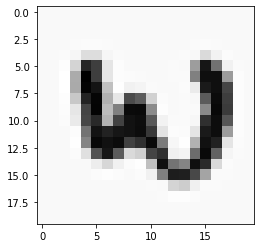

In [348]:
# select a random image among the data set
item = np.random.randint(5000)
#
# What is the prediction of the Neural Net
print('My Neural Network prediction is a',prediction[item])
# plot the random image
img = X[item]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys);